In [1]:
#importingh the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Cleaning

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

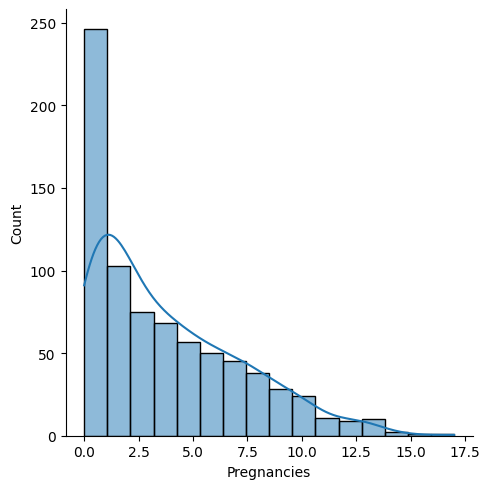

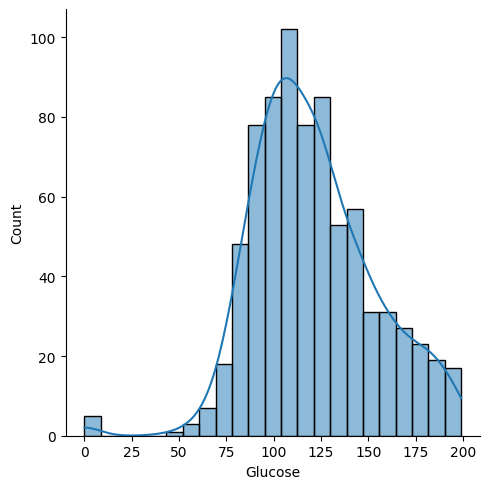

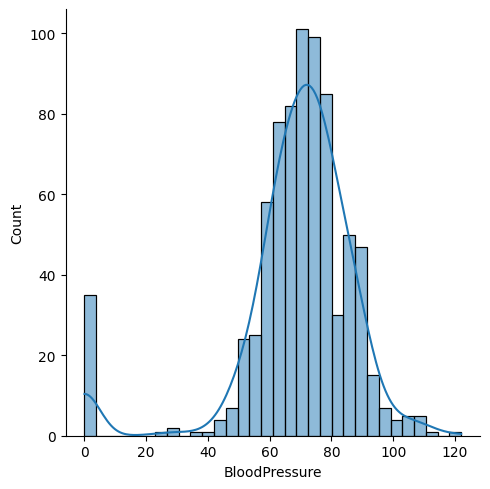

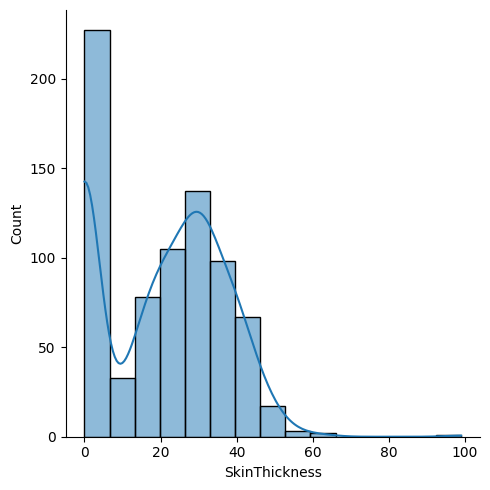

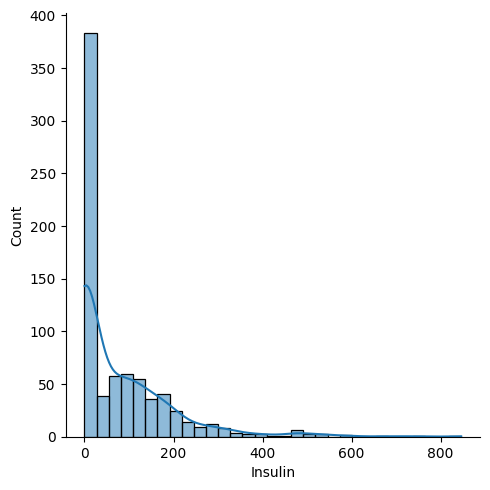

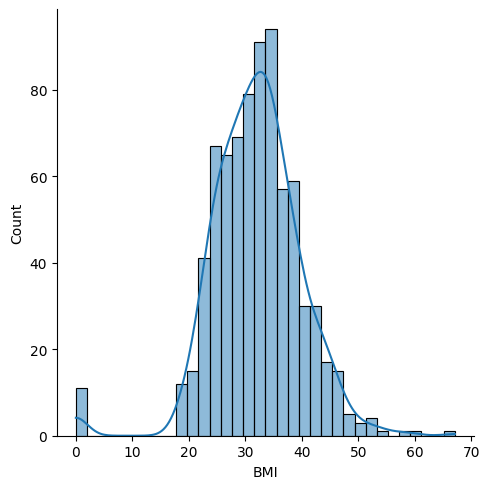

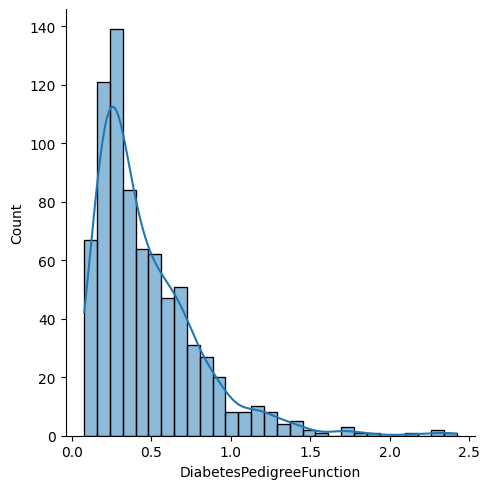

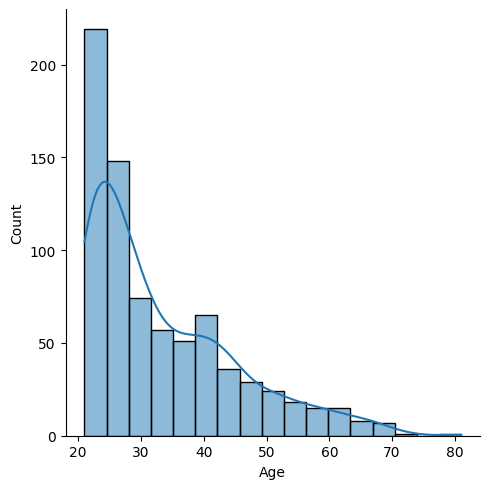

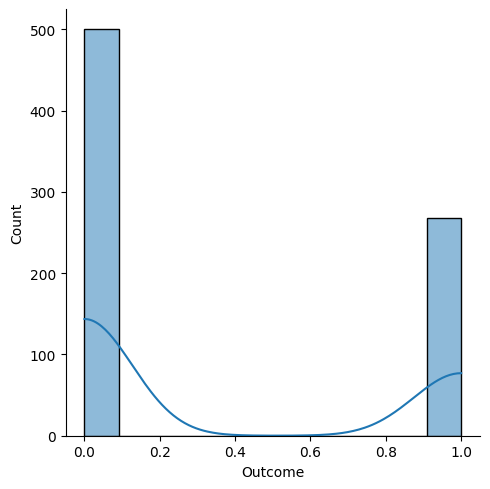

In [7]:
for col in df.columns:
    sns.displot(data=df,x=col,kde = True)
    plt.show()

In [8]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column

df['BMI'] = df['BMI'].replace(0,np.mean(df['BMI']))
df["Glucose"] = df["Glucose"].replace(0,np.mean(df["Glucose"]))
df["BloodPressure"] = df["BloodPressure"].replace(0,np.mean(df["BloodPressure"]))
df["SkinThickness"] = df["SkinThickness"].replace(0,np.mean(df["SkinThickness"]))
df["Insulin"] = df["Insulin"].replace(0,np.mean(df["Insulin"]))

#### Lets visualize outliers in data

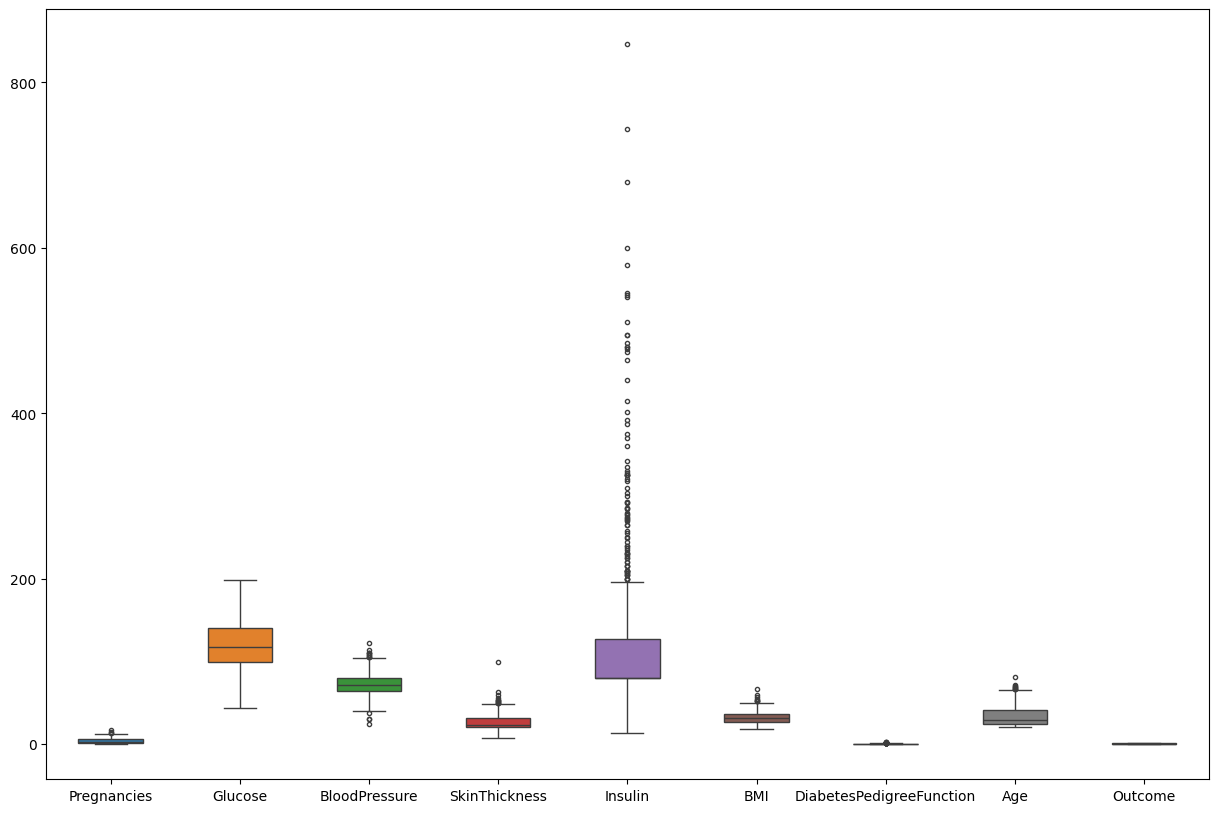

In [9]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(df,width=0.5,ax =ax,fliersize=3)
plt.show()

### Splitting the data into dependent and independent features

In [10]:
X = df.drop('Outcome',axis=1)
y = df["Outcome"]

In [11]:
X = X.values
y = y.values

#### The dataset is not balanced as we have "0", i.e not diabetes as almost double of "1"/diabetes.

In [12]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [14]:
X_train.shape,X_test.shape

((576, 8), (192, 8))

### Standardizing the data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [18]:
log_reg = LogisticRegression()

In [19]:
parameters = {'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],}

In [20]:
grid_cv = GridSearchCV(
    estimator=log_reg,     #algorithm,classifier
    param_grid=parameters, #parameters
    scoring='accuracy',    #performance metrics
    cv= 10                 # no. of folds for cross validation and hypertuning
)

In [21]:
grid_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [22]:
grid_cv.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [23]:
grid_cv.best_score_

0.763793103448276

### Creating a model best on best parameters after hyperparameter tuning

In [24]:
logreg = LogisticRegression(penalty='l2',C=1.0,solver='liblinear')

In [25]:
logreg.fit(X_train_scaled,y_train)

LogisticRegression(solver='liblinear')

In [26]:
y_pred = logreg.predict(X_test_scaled)

### getting performance metrics 

In [27]:
acc = accuracy_score(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
curve =roc_auc_score(y_test,y_pred)

In [28]:
print(f"Accuracy score: {acc}")
print(f"confusion matrix \n{con_mat}")
print(f"Classification report: \n{report}")
print(f"ROC_AUC score: {curve}")

Accuracy score: 0.796875
confusion matrix 
[[117  13]
 [ 26  36]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192

ROC_AUC score: 0.7403225806451613


In [29]:
TP = con_mat[0][0]
FP = con_mat[0][1]
FN = con_mat[1][0]
TN = con_mat[1][1]

In [30]:
print(f"TP :{TP}")
print(f"FP :{FP}")
print(f"FN :{FN}")
print(f"TN :{TN}")

TP :117
FP :13
FN :26
TN :36


In [31]:
precession = TP/(TP+FP)
recall = TP/(TP+FN)

In [32]:
print(f"Precession: {precession}")
print(f"Recall: {recall}")

Precession: 0.9
Recall: 0.8181818181818182


In [33]:
Acc = (TP+TN)/(TP+FP+TN+FN)
print(Acc)

0.796875


In [34]:
from sklearn.metrics import fbeta_score

In [35]:
for i in [1.1,1.5,1.8,2]:
    f_score = fbeta_score(y_test,y_pred,beta=i)
    print(f"beta = {i}: {f_score}")


beta = 1.1: 0.6415094339622641
beta = 1.5: 0.6206896551724138
beta = 1.8: 0.6108532095405795
beta = 2: 0.6060606060606061


### Storing the pickle files for the model and the standard scaler

In [36]:
import pickle

In [37]:
pickle.dump(scaler,open("standard_scaler.pkl","wb"))
pickle.dump(logreg,open("logistic_reg.pkl","wb"))